# Hyper-mutated and hypo-mutated threshold study and mutation frequency analysis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Datasets/Breast Invasive Carcinoma (Sanger, Nature 2012)")

# TOTAL DUCTAL 

In [3]:
data_mutation_TOTAL_ductal=pd.read_csv('mutation_table_Stephens_et_al_Sanger_Nature2012_TOTAL_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_TOTAL_ductal = data_mutation_TOTAL_ductal.iloc[:, 1:]
data_mutation_TOTAL_ductal

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,PD3857a,PD3857a,MYO15B,17,73592569,73592570,RNA,DEL,TG,TG,-,ENST00000578382.2:n.3139_3140del,*1047*,NaN,ENST00000578382,38791
1,PD3857a,PD3857a,CTTNBP2,7,117501370,117501371,Frame_Shift_Ins,INS,-,-,A,ENST00000160373.3:c.82-1_82insT,p.K28*,27.0,ENST00000160373,163489
2,PD3857a,PD3857a,MAGEB6,X,26212583,26212585,In_Frame_Del,DEL,AGA,AGA,-,ENST00000379034.1:c.625_627del,p.K209del,207.0,ENST00000379034,3207
3,PD3857a,PD3857a,FCRL5,1,157490878,157490878,Missense_Mutation,SNP,C,C,T,ENST00000361835.3:c.2444G>A,p.G815E,815.0,ENST00000361835,39144
4,PD3857a,PD3857a,CNTN2,1,205035644,205035644,Missense_Mutation,SNP,G,G,T,ENST00000331830.4:c.1892G>T,p.G631V,631.0,ENST00000331830,35303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,PD4939a,PD4939a,MUC16,19,9076181,9076181,Silent,SNP,C,C,T,ENST00000397910.4:c.11265G>A,p.Q3755=,3755.0,ENST00000397910,132499
5952,PD4939a,PD4939a,SHKBP1,19,41086542,41086542,Silent,SNP,C,C,G,ENST00000291842.5:c.633C>G,p.T211=,211.0,ENST00000291842,14549
5953,PD4939a,PD4939a,SPTLC3,20,13060509,13060509,Intron,SNP,G,G,C,ENST00000399002.2:c.607+5364G>C,*203*,NaN,ENST00000399002,157785
5954,PD4939a,PD4939a,GPR112,X,135429006,135429006,Silent,SNP,G,G,A,ENST00000394143.1:c.3141G>A,p.V1047=,1047.0,ENST00000394143,136094


In [4]:
# check if there are duplicate rows 
data_mutation_TOTAL_ductal.duplicated().sum()

0

### Mutation Rate analysis

In [5]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_TOTAL_ductal.loc[:, 'Mutation_length'] = data_mutation_TOTAL_ductal['End_Position']-data_mutation_TOTAL_ductal['Start_Position']+1

In [6]:
data_mutation_TOTAL_ductal['PATIENT_ID'].nunique()

76

In [7]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_TOTAL_ductal = data_mutation_TOTAL_ductal[['PATIENT_ID', 'Mutation_length']]

In [8]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_TOTAL_ductal_group_by_pts=pts_mutation_length_TOTAL_ductal.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_TOTAL_ductal_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [9]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_TOTAL_ductal = data_mutation_TOTAL_ductal[['Hugo_Symbol', 'Gene_length']]

In [10]:
# look at the number of distinct genes
gene_length_for_each_mutation_TOTAL_ductal['Hugo_Symbol'].nunique()

4396

In [11]:
# group by gene (Hugo_Symbol) 
mutation_TOTAL_ductal_group_by_gene=gene_length_for_each_mutation_TOTAL_ductal.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [12]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_TOTAL_ductal = mutation_TOTAL_ductal_group_by_gene['Gene_length'].sum()

In [13]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_TOTAL_ductal_group_by_pts["Mutation_rate"] = mutation_TOTAL_ductal_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_TOTAL_ductal

In [14]:
# multiply the Mutation_rate values for 10^6
mutation_TOTAL_ductal_group_by_pts["Mutation_rate*10^6"] = mutation_TOTAL_ductal_group_by_pts["Mutation_rate"]*1000000

In [15]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_TOTAL_ductal_group_by_pts= mutation_TOTAL_ductal_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [16]:
patient_mutation_rate_TOTAL_ductal=mutation_TOTAL_ductal_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [17]:
# adjust the indices
patient_mutation_rate_TOTAL_ductal = patient_mutation_rate_TOTAL_ductal.reset_index()
patient_mutation_rate_TOTAL_ductal = patient_mutation_rate_TOTAL_ductal.drop('index', axis=1)

In [18]:
patients_TOTAL_ductal=np.arange(0,76,1)
# convert a series into a Numpy array
mutation_rate_TOTAL_ductal=mutation_TOTAL_ductal_group_by_pts[['Mutation_rate*10^6']].to_numpy()

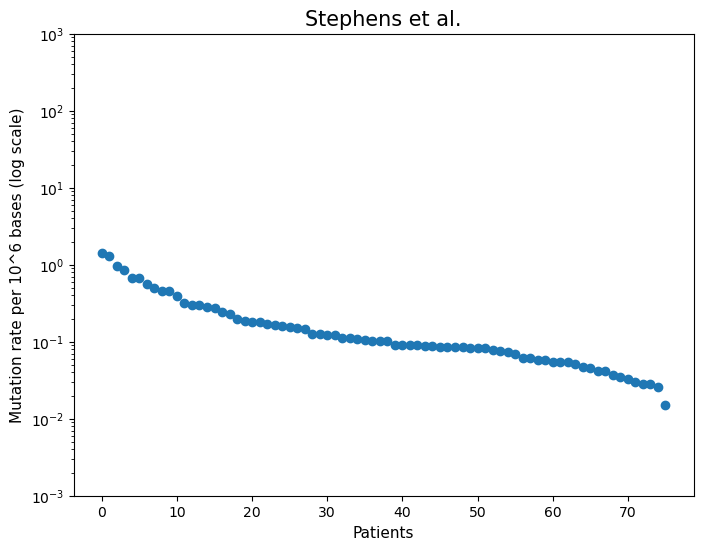

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xlabel("Patients", fontsize=11)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=11)
plt.title("Stephens et al.", fontsize=15)
plt.show()

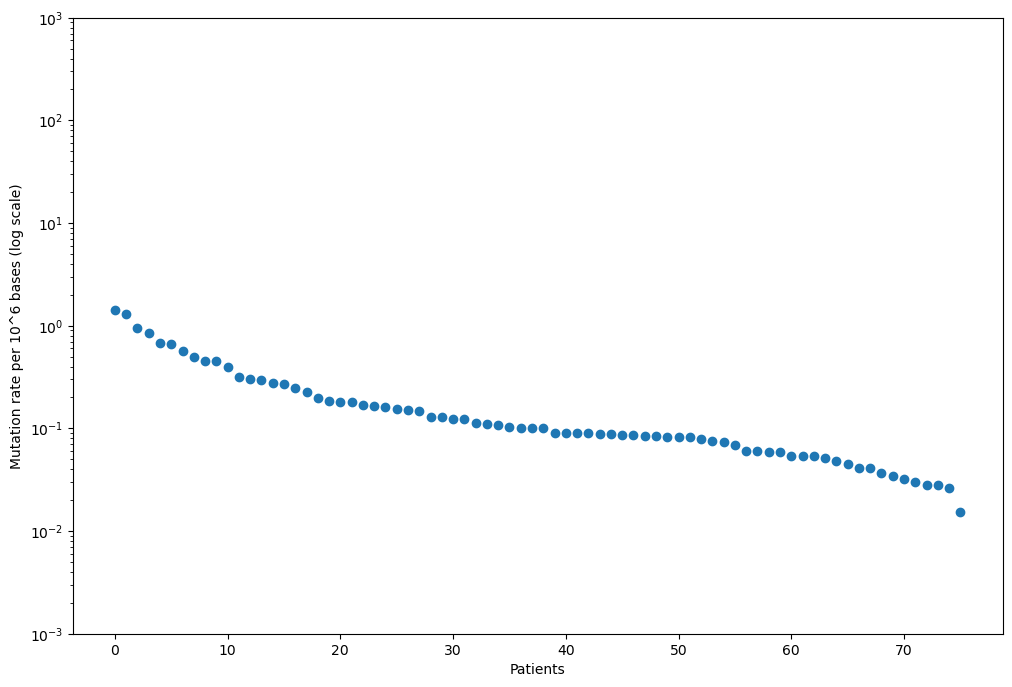

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

In [21]:
array_mutation_rate_TOTAL_ductal = np.array(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6'])

### Study of the thresholds with KneeLocator

In [22]:
colonne_iper = ['Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap']
df_soglia_iper = pd.DataFrame(columns = colonne_iper)

72
dx_3: 71
yx_3: -1.5180865192133697
dx_4: 72
yx_4: -1.5502712025847711
gap_max 0.03218468337140146
dim_finale_x_sx: 71
dim_inizio_y_sx: 5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[ 0.15268928  0.1139367  -0.02175003 -0.07314995 -0.17285286 -0.17707618
 -0.24591326 -0.30060257 -0.34199526 -0.34199526 -0.40176347 -0.4998617
 -0.52119975 -0.52749399 -0.55362484 -0.56730454 -0.61113611 -0.64302526
 -0.70042673 -0.73479563 -0.74513646 -0.74513646 -0.77211995 -0.78340096
 -0.79498284 -0.80688206 -0.81911651 -0.83170564 -0.89336254 -0.89336254
 -0.9083397  -0.9083397  -0.94821121 -0.95664438 -0.96524455 -0.98297332
 -0.9921167  -0.9921167  -0.9921167  -1.04096526 -1.04096526 -1.04096526
 -1.04096526 -1.0514307  -1.0514307  -1.06215456 -1.06215456 -1.07314995
 -1.07314995 -1.08443096 -1.08443096 -1.08443096 -1.10791205

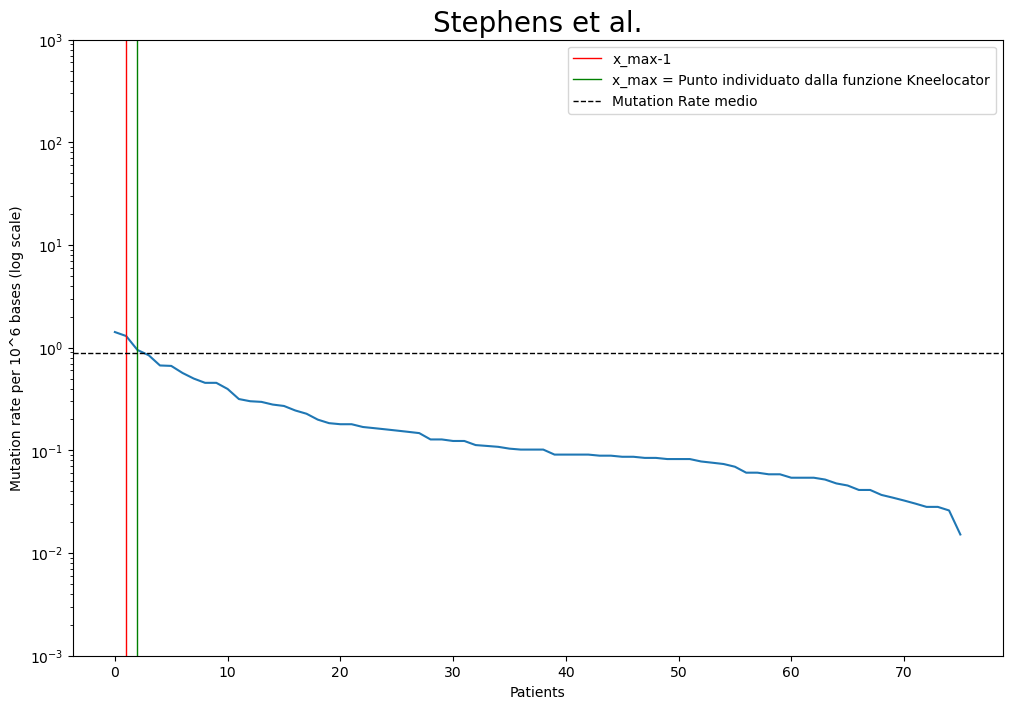

In [23]:
from kneed import KneeLocator, DataGenerator as dg

x_Stephens=patients_TOTAL_ductal
y_Stephens=np.array(np.log10(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_Stephens, y_Stephens, S=0.1, curve="convex", direction="decreasing", online = True)
print(kl.knee)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_Stephens[x4]
x3 = kl.knee -1 # x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_Stephens[x3]
dim_inizio_x = 0
dim_finale_x = len(x_Stephens) 
dim_inizio_y = 0
dim_finale_y = len(y_Stephens) 

print('dx_3:', x3)  
print('yx_3:', y3)   
print('dx_4:', x4)   
print('yx_4:', y4)   

gap_max_Stephens = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
print('gap_max', gap_max_Stephens) 
x_max_Stephens = x3

dim_finale_x = x3
print('dim_finale_x_sx:', dim_finale_x)   
dim_inizio_y = dim_finale_y - x3          # !! In questo modo, i sub-intervalli considerati sia per x che per y sono uguali
print('dim_inizio_y_sx:', dim_inizio_y)   

x_sub = x_Stephens[0:dim_finale_x] # diminuendo dim_finale_x si vanno a considerare i pazienti con mutation rate più alto
y_sub = y_Stephens[0:x3] # aumentando dim_inizio_y si vanno a considerare i valori più bassi della mutation rate,essendo y_Stephens decrescente 
# x_sub e y_sub hanno la stessa lunghezza

print(x_sub)
print(y_sub)

while (dim_finale_x > 1): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    print(kl.knee)

    x4 = kl.knee
    y4 = y_Stephens[x4]
    x3 = kl.knee - 1
    y3 = y_Stephens[x3]

    print('dx_3:', x3)   
    print('yx_3:', y3)
    print('dx_4:', x4)
    print('yx_4:', y4)

    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 
    print('gap', gap)

    if gap > gap_max_Stephens: # aggiorna il gap massimo!!!
        gap_max_Stephens = gap
        print('gap_max:',gap_max_Stephens)
        x_max_Stephens = x4  # x4 > x3
        print('x:',x_max_Stephens)
    

    dim_finale_x = x3
    print('dim_finale_x:', dim_finale_x)
    dim_inizio_y = dim_finale_y - x3
    print('dim_inizio_y:', dim_inizio_y)

    x_sub = x_Stephens[0:dim_finale_x]
    y_sub = y_Stephens[0:x3]

    print('x_sub:',x_sub)
    print('y_sub:',y_sub)

y_max_Stephens_inf = array_mutation_rate_TOTAL_ductal[x_max_Stephens+1]
y_max_Stephens_sup = array_mutation_rate_TOTAL_ductal[x_max_Stephens]
y_max_Stephens_avg = (y_max_Stephens_inf + y_max_Stephens_sup)/2
y_grafico_media = (y_Stephens[x_max_Stephens]+y_Stephens[x_max_Stephens-1])/2
print('gap_max:',gap_max_Stephens)
print('x:',x_max_Stephens)
print('mutation rate inf:', y_max_Stephens_inf)
print('mutation rate sup:', y_max_Stephens_sup)
print('mutation rate avg:', y_max_Stephens_avg)
fig = plt.figure(figsize=(12, 8))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("Stephens et al.",fontsize=20)
plt.axvline(x=x_max_Stephens-1, color='red', linestyle='-', linewidth = 1,  label = 'x_max-1')
plt.axvline(x=x_max_Stephens, color='green', linestyle='-', linewidth = 1, label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axhline(y=y_max_Stephens_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend()
#set axes limit
plt.ylim(0.001, 1000)
plt.show()

#'Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap'
#df_soglia_iper = df_soglia_iper.append({'Studio': 'Stephens et al.', 'x_max': x_max_Stephens, 'mutation rate x_max':y_max_Stephens_sup,  'x_max+1': x_max_Stephens+1, 'mutation_rate x_max+1': y_max_Stephens_inf,'gap': gap_max_Stephens }, ignore_index=True)

### Manual study of the thresholds

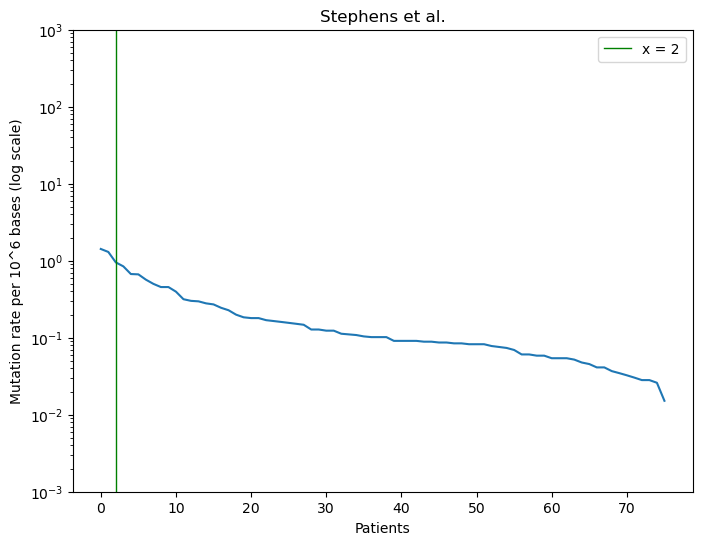

In [24]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.axvline(x=2, color='green', linestyle='-', linewidth = 1, label='x = 2')
plt.title ("Stephens et al.",fontsize=12)
plt.legend()
plt.show()

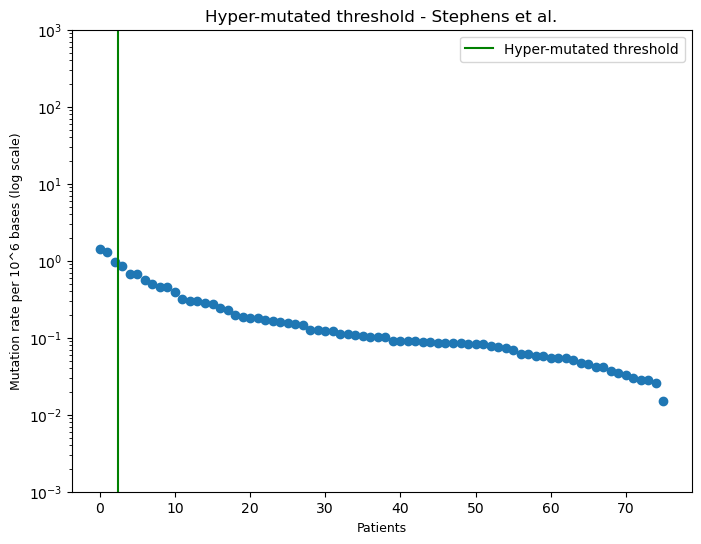

In [25]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xlabel("Patients", fontsize=9)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=9)
plt.axvline(x=2.47, color='green', linestyle='-', label='Hyper-mutated threshold')
#plt.axhline(y=0.9, color='red', linestyle='-', label='Hyper-mutated threshold')  # Fixed the missing parenthesis here
plt.title ("Hyper-mutated threshold - Stephens et al.", fontsize=12)
plt.legend()
plt.show()

(0.3964939225411553, 1.4213115474699338)

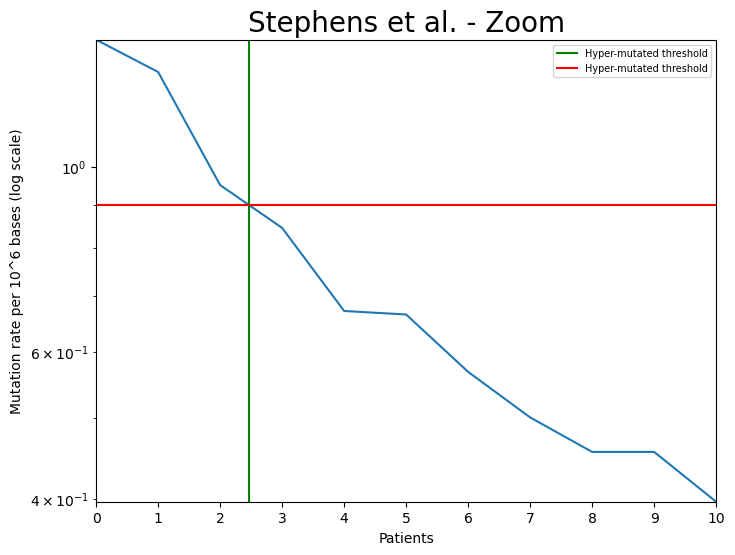

In [26]:
## ZOOM
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xticks(np.arange(min(patients_TOTAL_ductal), max(patients_TOTAL_ductal)+1, 1.0))
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("Stephens et al. - Zoom",fontsize=20)
#plt.axvline(x=x_max_Stephens+1, color='red', linestyle='-')
x1_Stephens, y1_Stephens = (patients_TOTAL_ductal[0], patient_mutation_rate_TOTAL_ductal.loc[0, 'Mutation_rate*10^6'])
x2_Stephens, y2_Stephens = (patients_TOTAL_ductal[10], patient_mutation_rate_TOTAL_ductal.loc[10, 'Mutation_rate*10^6'])
plt.axvline(x=2.47, color='green', linestyle='-', label='Hyper-mutated threshold')
plt.axhline(y=0.9, color='red', linestyle='-', label='Hyper-mutated threshold')  # Fixed the missing parenthesis here
plt.legend(loc='upper right', fontsize = 7)
plt.gca().set_xlim(x1_Stephens, x2_Stephens)
plt.gca().set_ylim(y2_Stephens, y1_Stephens)

## ZOOM - KneeLocator

(0.3964939225411553, 1.4213115474699338)

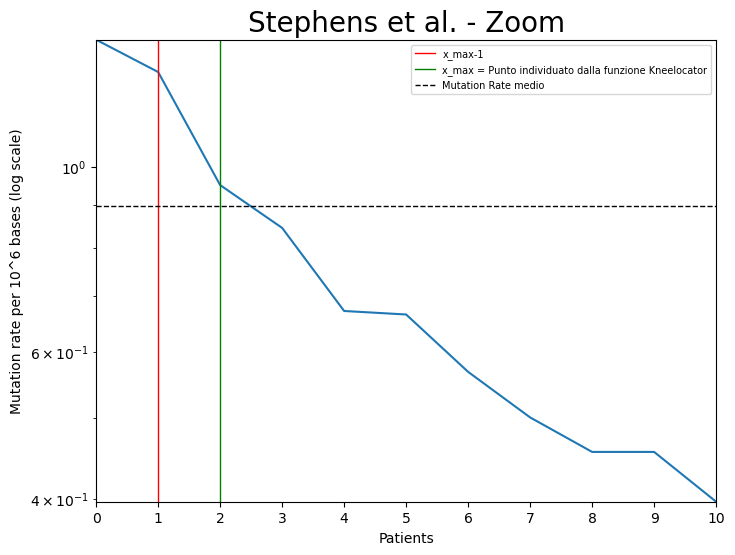

In [27]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xticks(np.arange(min(patients_TOTAL_ductal), max(patients_TOTAL_ductal)+1, 1.0))
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("Stephens et al. - Zoom",fontsize=20)
#plt.axvline(x=x_max_Stephens+1, color='red', linestyle='-')
x1_Stephens, y1_Stephens = (patients_TOTAL_ductal[0], patient_mutation_rate_TOTAL_ductal.loc[0, 'Mutation_rate*10^6'])
x2_Stephens, y2_Stephens = (patients_TOTAL_ductal[10], patient_mutation_rate_TOTAL_ductal.loc[10, 'Mutation_rate*10^6'])
plt.axvline(x=x_max_Stephens-1, color='red', linestyle='-', linewidth = 1,  label = 'x_max-1')
plt.axvline(x=x_max_Stephens, color='green', linestyle='-', linewidth = 1, label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axhline(y=y_max_Stephens_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend(loc='upper right', fontsize = 7)
plt.gca().set_xlim(x1_Stephens, x2_Stephens)
plt.gca().set_ylim(y2_Stephens, y1_Stephens)

In [28]:
# create a table containing the iterated values: x3, y3, x4, y4, gap. For each row, one iteration.

x_Stephens=patients_TOTAL_ductal
y_Stephens=np.array(np.log10(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_Stephens, y_Stephens, S=0.1, curve="convex", direction="decreasing", online = True)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_Stephens[x4]
x3 = kl.knee -1 # x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_Stephens[x3]
dim_inizio_x = 0
dim_finale_x = len(x_Stephens) #164
dim_inizio_y = 0
dim_finale_y = len(x_Stephens) #164

gap_Stephens = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
x_max_Stephens = x3

data = [[x4, y4, x3, y3, gap_Stephens]] # inizializzo data con il primo risultato di Kneelocator

dim_finale_x = x3
dim_inizio_y = dim_finale_y - x3 # !! In questo modo, i sub-intervalli considerati sia per x che per y sono uguali

x_sub = x_Stephens[0:dim_finale_x] # da 0 a 156 --> 156 = lunghezza del vettore
y_sub = y_Stephens[0:x3] # da 8 a 164 --> 156 = lunghezza del vettore
# x_sub e y_sub hanno la stessa lunghezza

while (dim_finale_x > 2): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    
    x4 = kl.knee
    y4 = y_Stephens[x4]
    x3 = kl.knee - 1
    y3 = y_Stephens[x3]
    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 

    data.append([x4, y4, x3, y3, gap])
  
    dim_finale_x = x3
    dim_inizio_y = dim_finale_y - x3
    dim_finale_y = x3
   
    x_sub = x_Stephens[0:x3]
    y_sub = y_Stephens[0:x3]
    
cols=['x4','y4','x3','y3','gap']
result_KneeLocator = pd.DataFrame(data, columns=cols)  
result_KneeLocator

,x4,y4,x3,y3,gap
0,72,-1.550271,71,-1.518087,0.032185
1,66,-1.385461,65,-1.341995,0.043466
2,60,-1.266275,59,-1.232851,0.033424
3,56,-1.217057,55,-1.159065,0.057992
4,39,-1.040965,38,-0.992117,0.048849
5,32,-0.948211,31,-0.908340,0.039872
6,28,-0.893363,27,-0.831706,0.061657
7,18,-0.700427,17,-0.643025,0.057401
8,11,-0.499862,10,-0.401763,0.098098
9,6,-0.245913,5,-0.177076,0.068837


In [29]:
# save the dataset 
result_KneeLocator.to_csv('Points_foundbyKneeLocator_Stephens.csv', index=False, sep=',')

### Mutation Frequency analysis

In [30]:
genes_patients_TOTAL_ductal=data_mutation_TOTAL_ductal[['PATIENT_ID', 'Hugo_Symbol']]

In [31]:
genes_patients_TOTAL_ductal=genes_patients_TOTAL_ductal.drop_duplicates()

In [32]:
n_of_pts_per_gene_TOTAL_ductal= genes_patients_TOTAL_ductal.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_TOTAL_ductal.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [33]:
tot_pts_TOTAL_ductal = 76

In [34]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_TOTAL_ductal["Mutation_frequency (%)"] = (n_of_pts_per_gene_TOTAL_ductal["Num_pts_per_gene"]*100)/tot_pts_TOTAL_ductal

In [35]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_TOTAL_ductal= n_of_pts_per_gene_TOTAL_ductal.sort_values(by="Num_pts_per_gene", ascending=False)

In [36]:
gene_mutation_frequency_TOTAL_ductal = n_of_pts_per_gene_TOTAL_ductal[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [37]:
# select the first 50 genes
highest_mutated_genes_TOTAL_ductal=gene_mutation_frequency_TOTAL_ductal.head(50)

In [38]:
mutated_gene_names=highest_mutated_genes_TOTAL_ductal['Hugo_Symbol'].tolist()

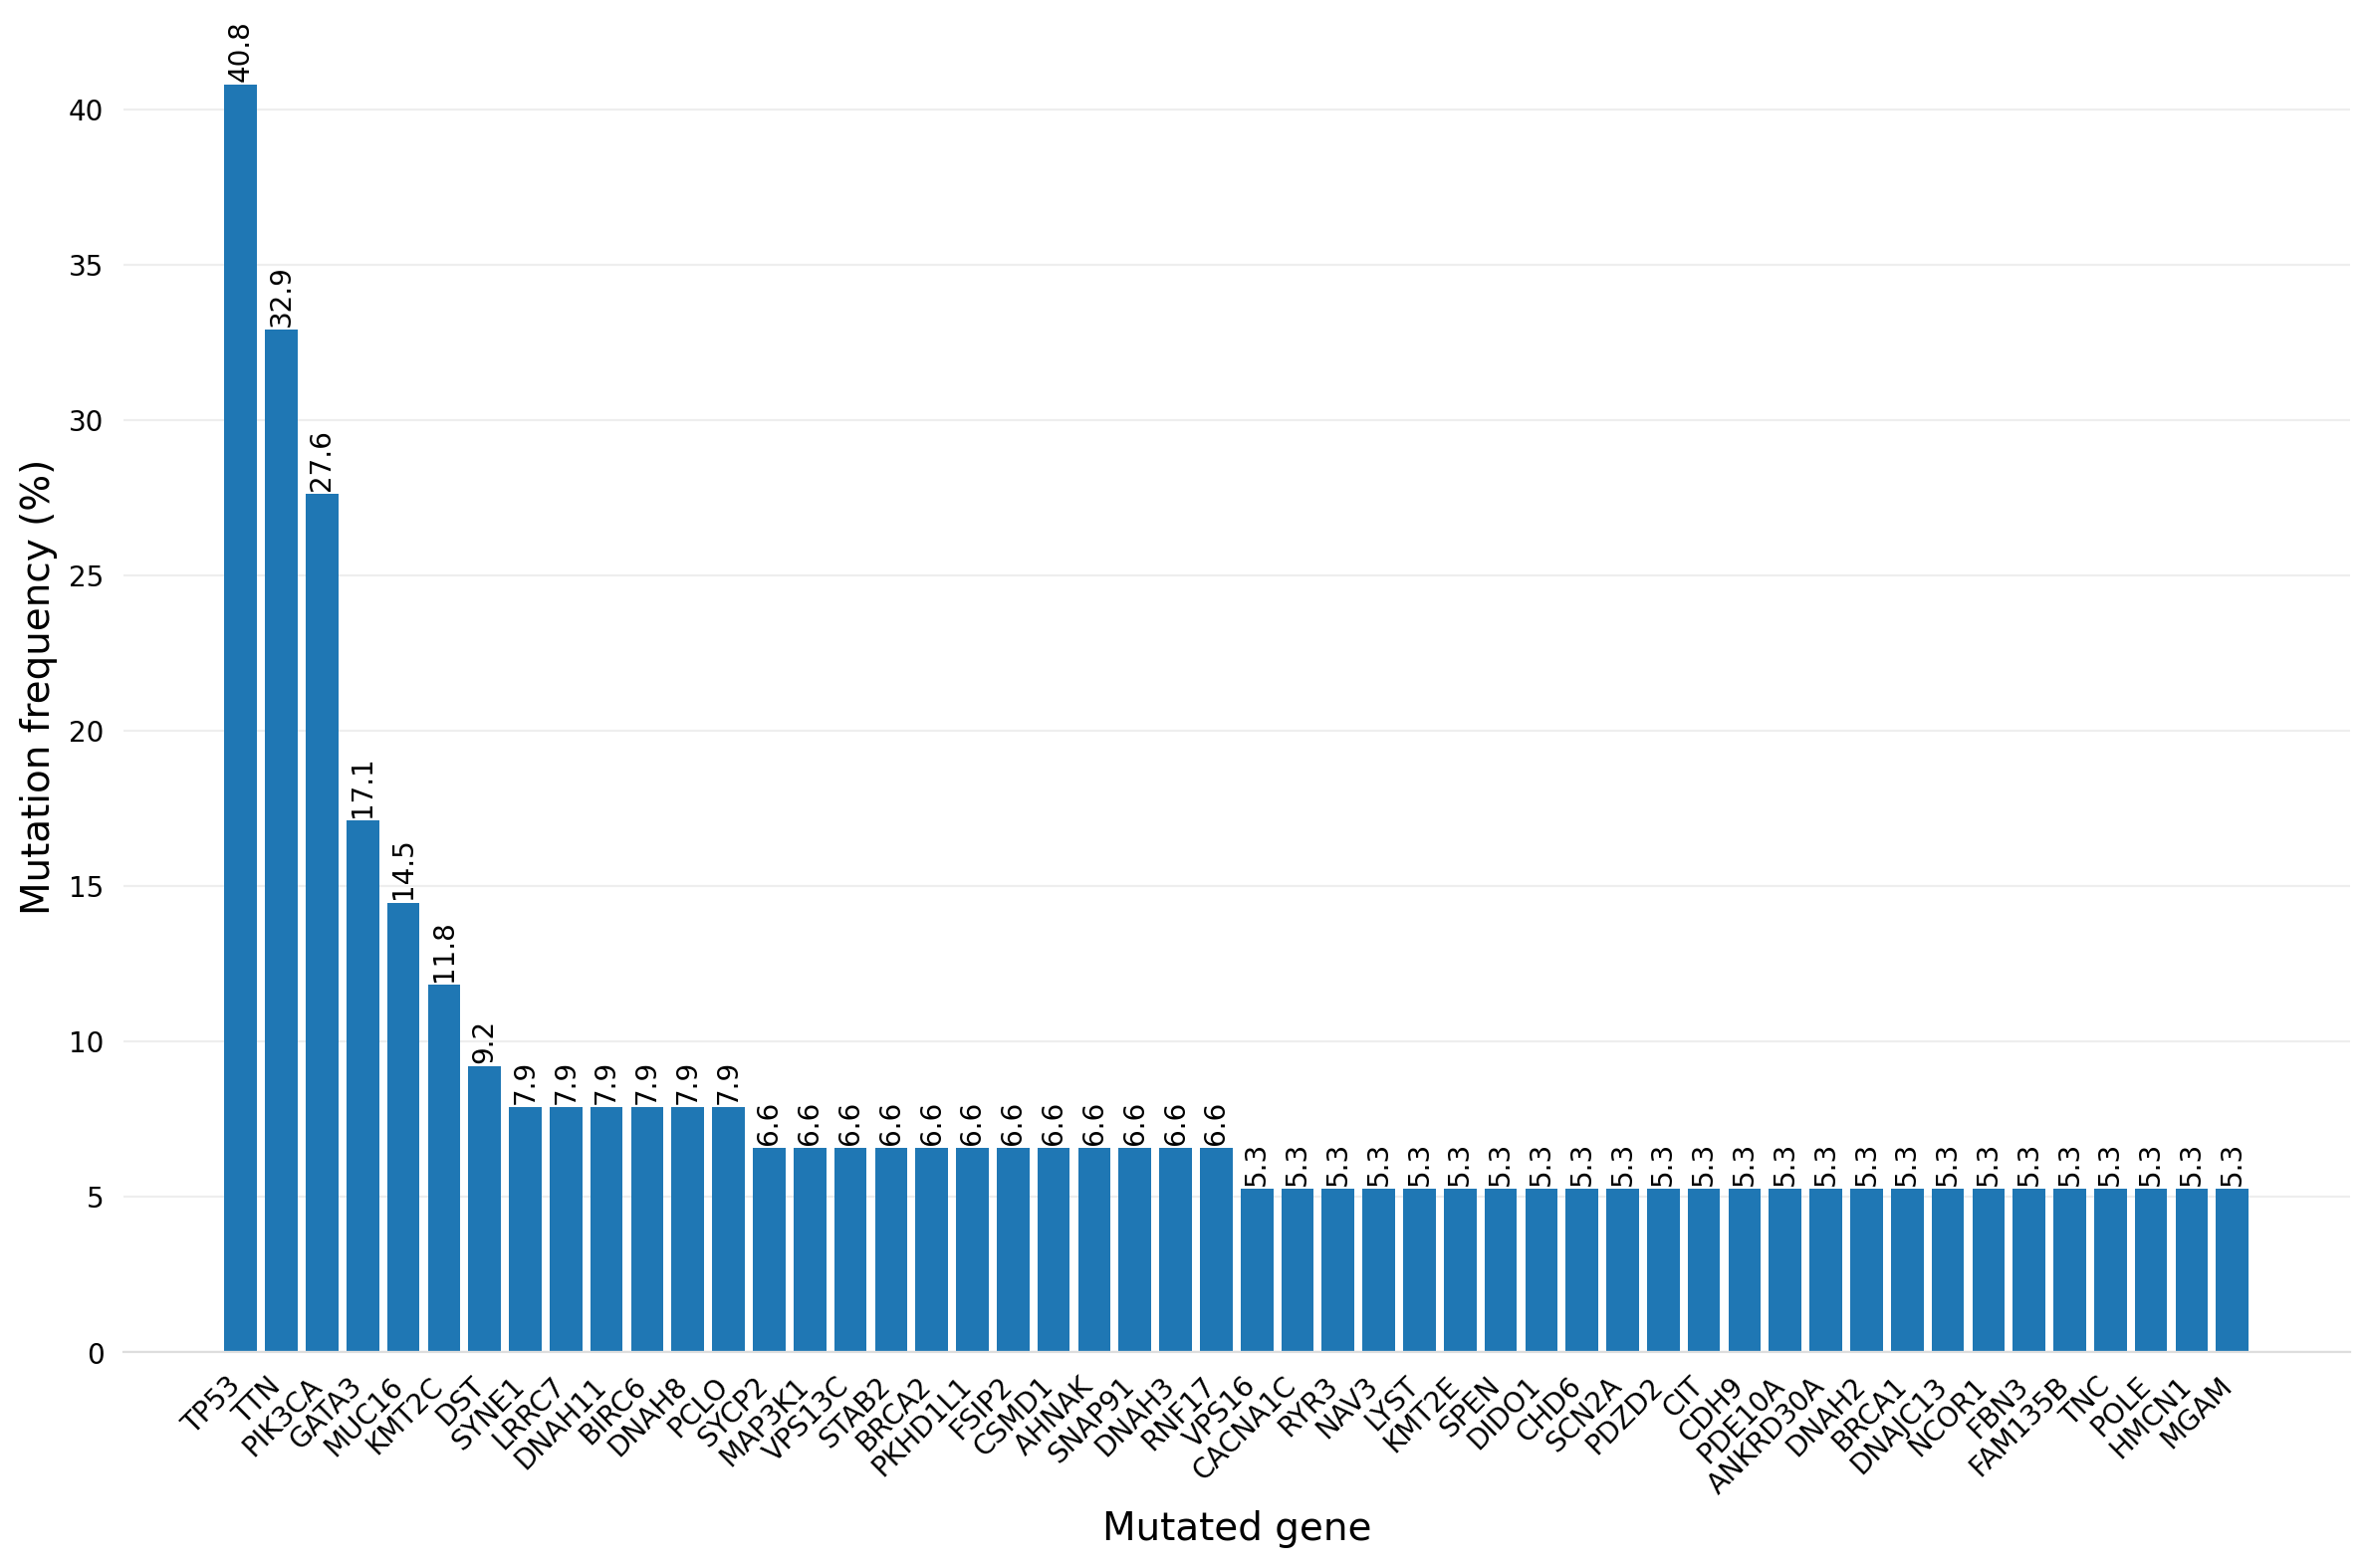

In [39]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_TOTAL_ductal['Hugo_Symbol'], highest_mutated_genes_TOTAL_ductal['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# DUCTAL and TRIPLE-NEGATIVE 

In [40]:
data_mutation_ductal_TN=pd.read_csv('mutation_table_Stephens_et_al_Sanger_Nature2012_TN_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_TN = data_mutation_ductal_TN.iloc[:, 1:]
data_mutation_ductal_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,PD3987a,PD3987a,ANKRD18A,9,38615632,38615632,Frame_Shift_Del,DEL,T,T,-,ENST00000399703.5:c.454del,p.R152Dfs*12,152.0,ENST00000399703,80092
1,PD3987a,PD3987a,TXLNG,X,16836744,16836747,Frame_Shift_Del,DEL,GAAA,GAAA,-,ENST00000380122.5:c.151_154del,p.K51Qfs*38,50.0,ENST00000380122,58093
2,PD3987a,PD3987a,SP140,2,231155280,231155280,Splice_Site,SNP,G,G,T,ENST00000392045.3:c.1825+1G>T,p.X609_splice,609.0,ENST00000392045,155937
3,PD3987a,PD3987a,ARHGEF26,3,153970973,153970973,Splice_Site,SNP,G,G,A,ENST00000356448.4:c.2368+1G>A,p.X790_splice,790.0,ENST00000356448,136825
4,PD3987a,PD3987a,PGLYRP3,1,153277444,153277444,Missense_Mutation,SNP,C,C,T,ENST00000290722.1:c.355G>A,p.A119T,119.0,ENST00000290722,12857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,PD4844a,PD4844a,HCFC1,X,153223635,153223635,Silent,SNP,G,G,A,ENST00000310441.7:c.1869C>T,p.S623=,623.0,ENST00000310441,24255
1182,PD4844a,PD4844a,RB1,13,48941721,48941733,Frame_Shift_Del,DEL,AGACTGATTCTAT,AGACTGATTCTAT,-,ENST00000267163.4:c.1035_1047delTGATTCTATAGAC,p.D346Vfs*17,344.0,ENST00000267163,178236
1183,PD4844a,PD4844a,TP53,17,7579359,7579359,Frame_Shift_Del,DEL,G,G,-,ENST00000269305.4:c.328delC,p.R110Vfs*13,110.0,ENST00000269305,25760
1184,PD4844a,PD4844a,PIK3CA,3,178916950,178916955,In_Frame_Del,DEL,CTCAAT,CTCAAT,-,ENST00000263967.3:c.338_343delTCAATC,p.L113_N114del,113.0,ENST00000263967,91980


In [41]:
# check if there are duplicate rows 
data_mutation_ductal_TN.duplicated().sum()

0

### Mutation Rate analysis

In [42]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_TN['End_Position']-data_mutation_ductal_TN['Start_Position']+1

In [43]:
data_mutation_ductal_TN['PATIENT_ID'].nunique()

13

In [44]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_TN = data_mutation_ductal_TN[['PATIENT_ID', 'Mutation_length']]

In [45]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_TN_group_by_pts=pts_mutation_length_ductal_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [46]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_TN = data_mutation_ductal_TN[['Hugo_Symbol', 'Gene_length']]

In [47]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_TN['Hugo_Symbol'].nunique()

1074

In [48]:
# group by gene (Hugo_Symbol) 
mutation_ductal_TN_group_by_gene=gene_length_for_each_mutation_ductal_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [49]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_TN = mutation_ductal_TN_group_by_gene['Gene_length'].sum()

In [50]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_TN_group_by_pts["Mutation_rate"] = mutation_ductal_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_TN

In [51]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_TN_group_by_pts["Mutation_rate"]*1000000

In [52]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_TN_group_by_pts= mutation_ductal_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [53]:
patient_mutation_rate_ductal_TN=mutation_ductal_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [54]:
patients=np.arange(0,13,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

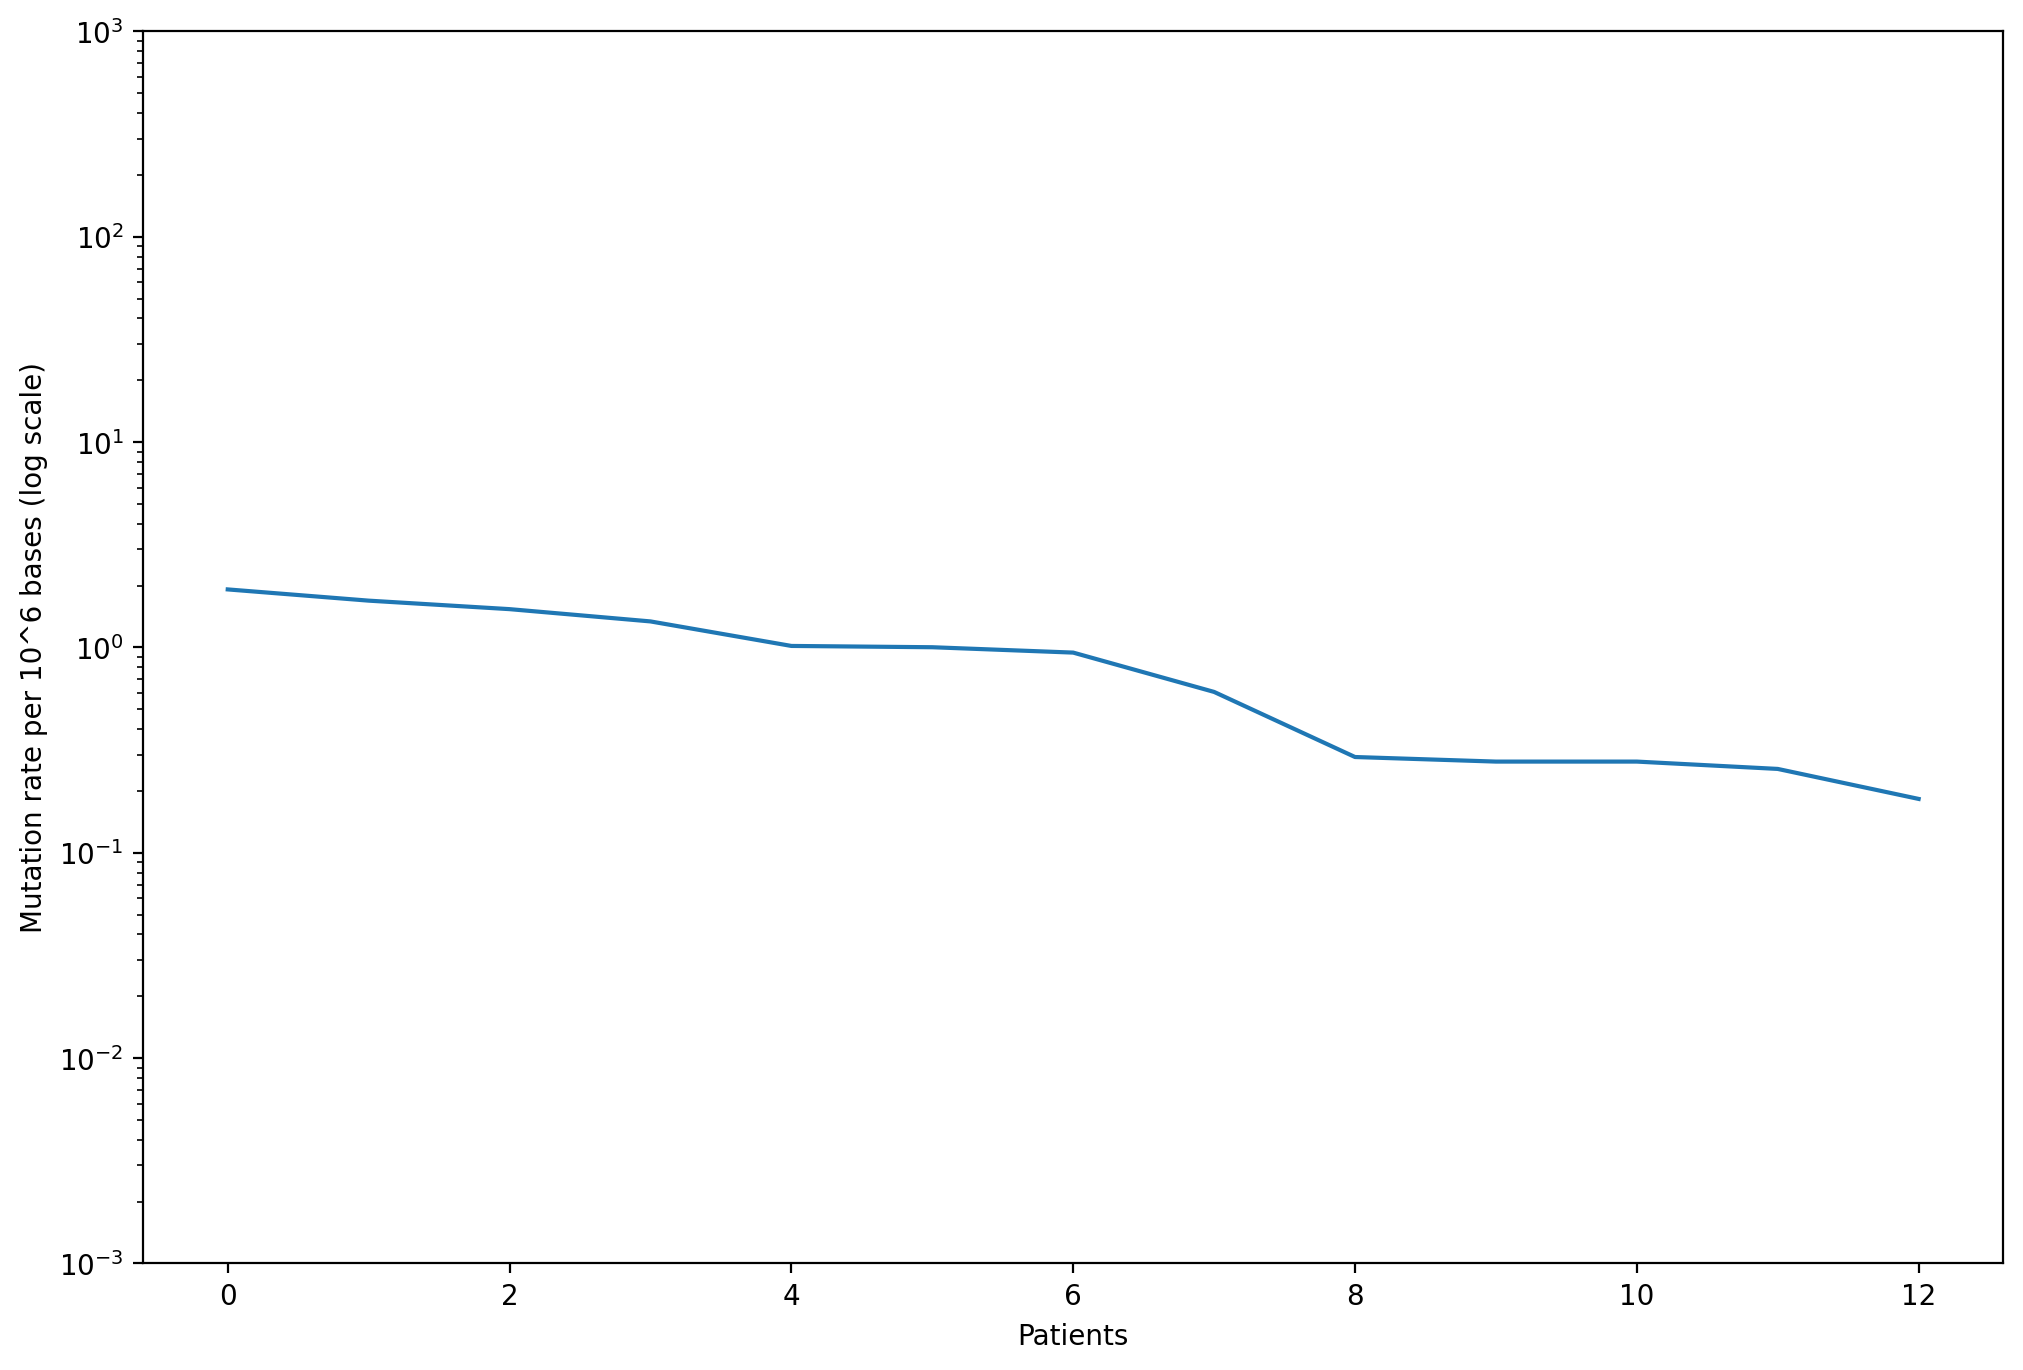

In [55]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

In [56]:
genes_patients_ductal_TN=data_mutation_ductal_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [57]:
genes_patients_ductal_TN=genes_patients_ductal_TN.drop_duplicates()

In [58]:
n_of_pts_per_gene_ductal_TN= genes_patients_ductal_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [59]:
tot_pts_ductal_TN = 13

In [60]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_TN

In [61]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_TN= n_of_pts_per_gene_ductal_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [62]:
gene_mutation_frequency_ductal_TN = n_of_pts_per_gene_ductal_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [63]:
# select the first 50 genes
highest_mutated_genes_ductal_TN=gene_mutation_frequency_ductal_TN.head(50)

In [64]:
mutated_gene_names=highest_mutated_genes_ductal_TN['Hugo_Symbol'].tolist()

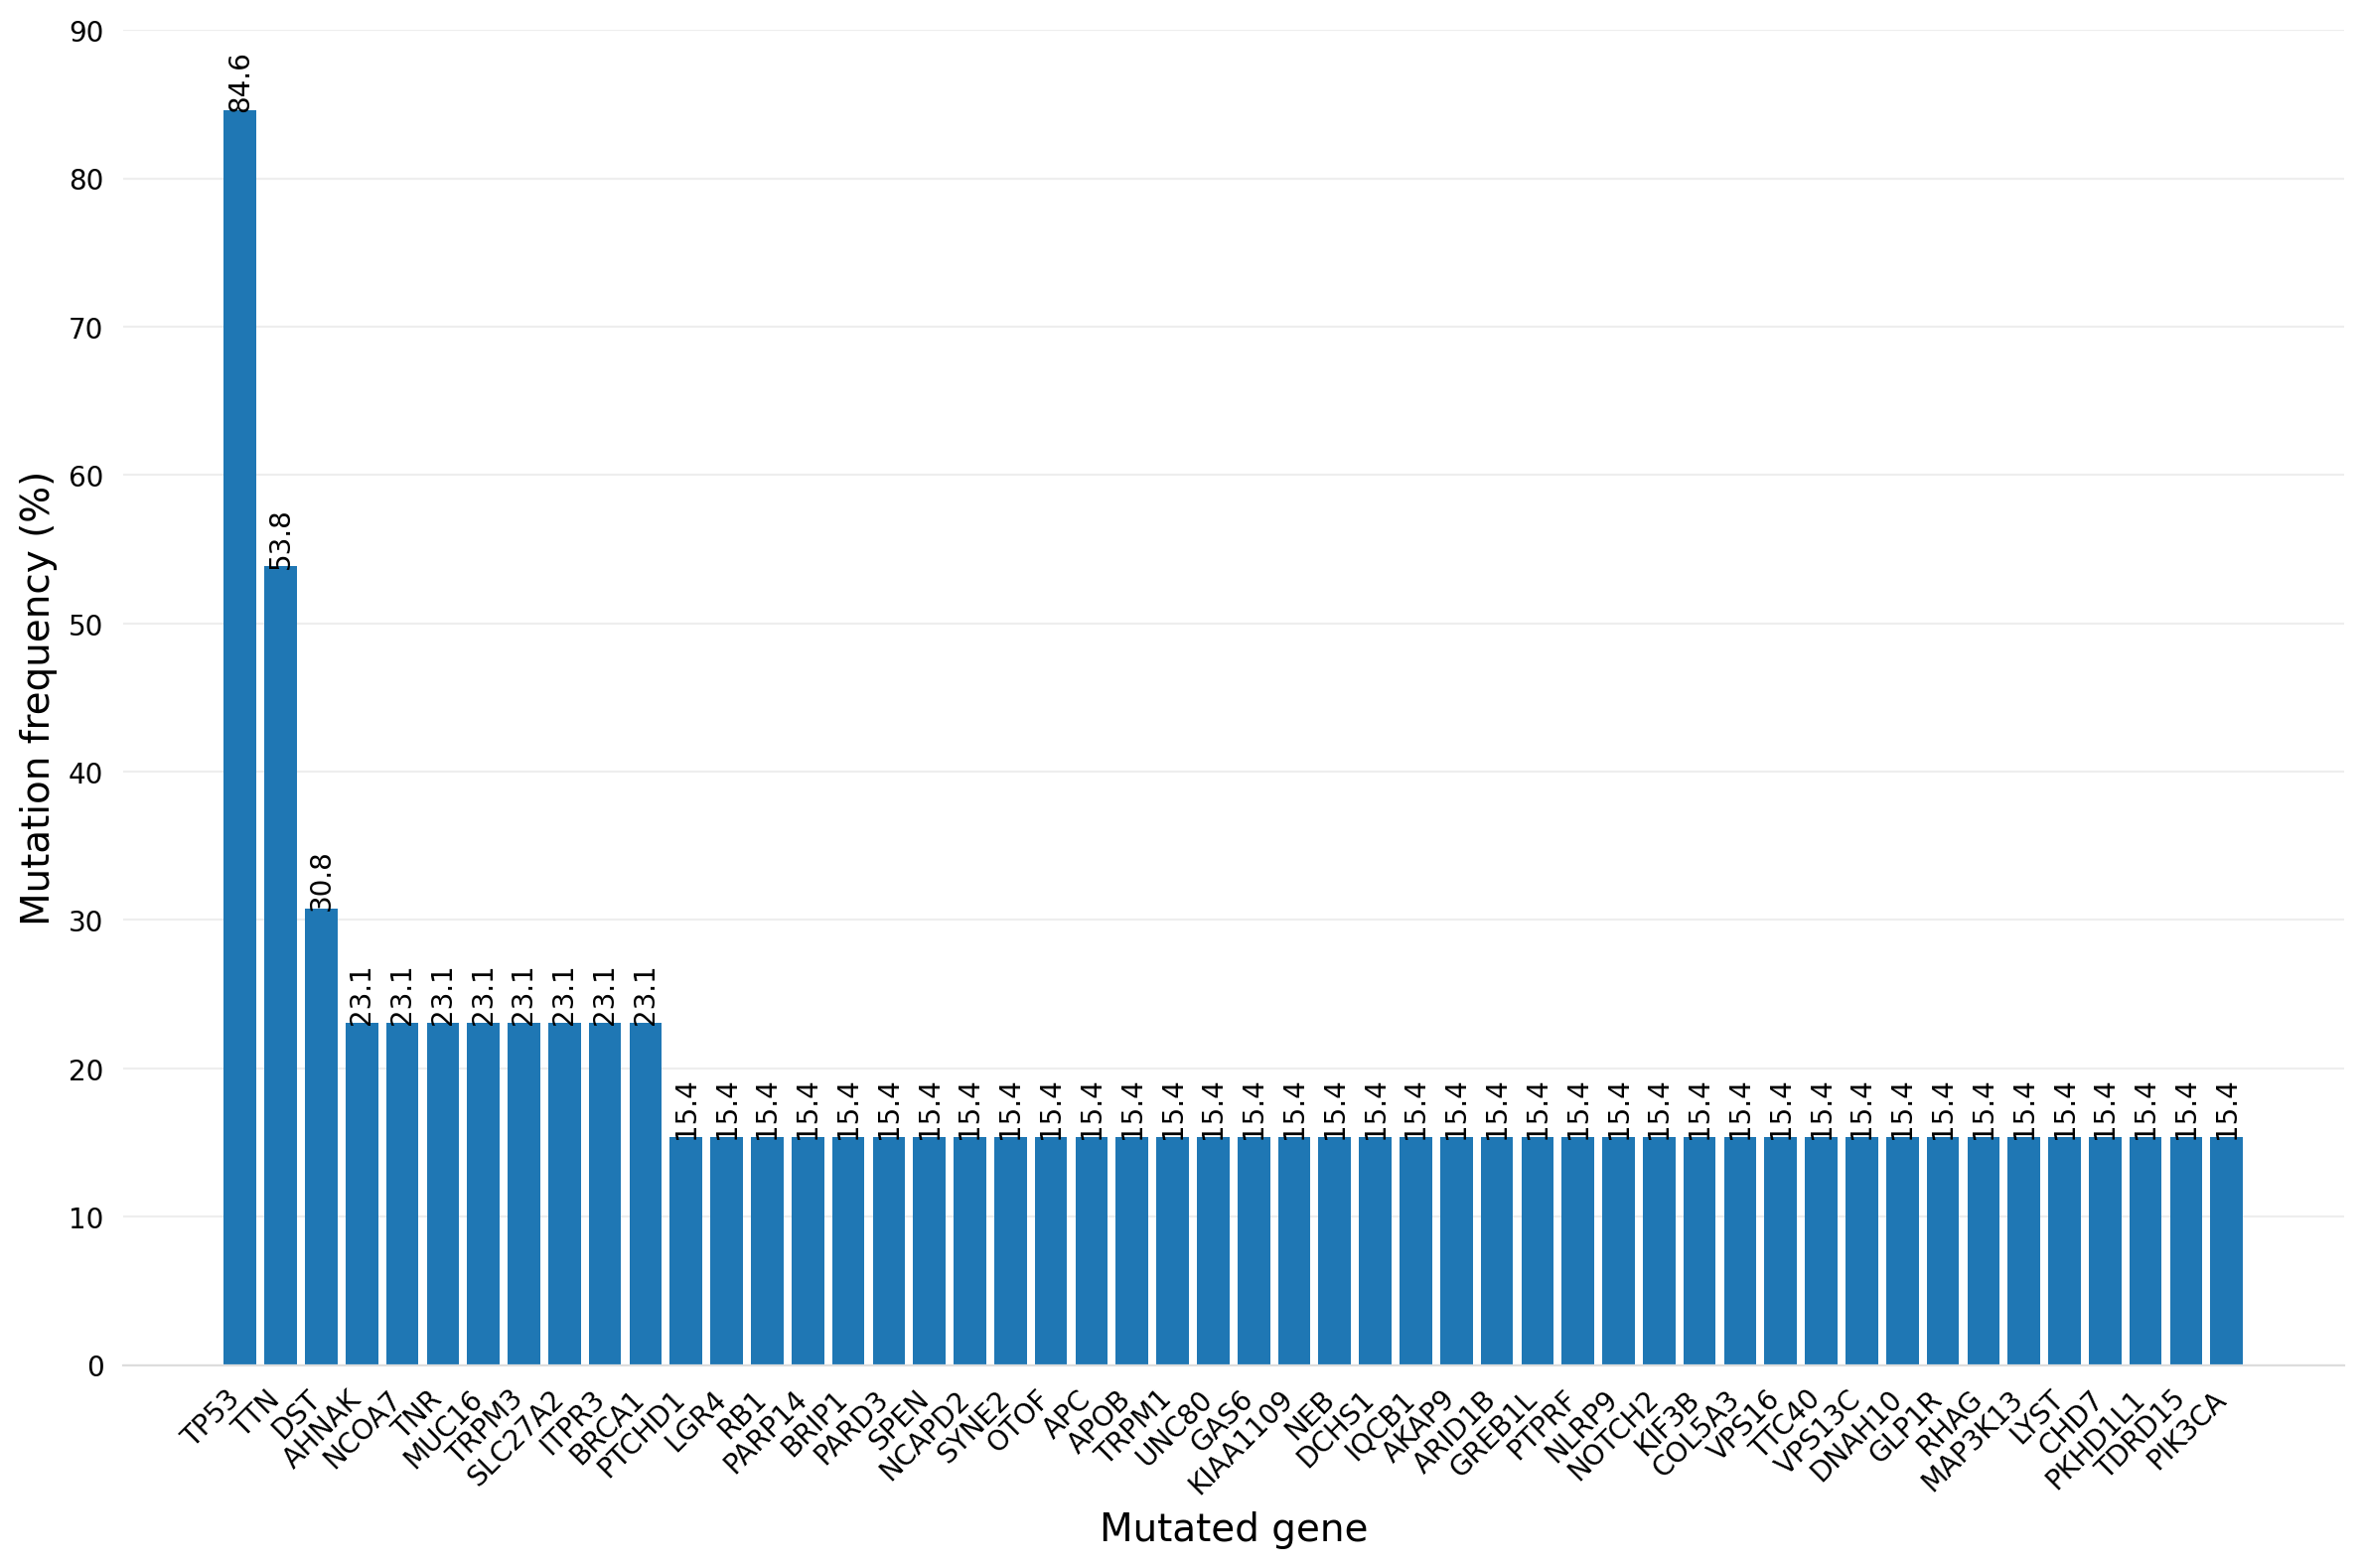

In [65]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_TN['Hugo_Symbol'], highest_mutated_genes_ductal_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 90)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# DUCTAL NON TRIPLE-NEGATIVE 

In [66]:
data_mutation_ductal_NON_TN=pd.read_csv('mutation_table_Stephens_et_al_Sanger_Nature2012_NON_TN_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN.iloc[:, 1:]
data_mutation_ductal_NON_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,PD3857a,PD3857a,MYO15B,17,73592569,73592570,RNA,DEL,TG,TG,-,ENST00000578382.2:n.3139_3140del,*1047*,NaN,ENST00000578382,38791
1,PD3857a,PD3857a,CTTNBP2,7,117501370,117501371,Frame_Shift_Ins,INS,-,-,A,ENST00000160373.3:c.82-1_82insT,p.K28*,27.0,ENST00000160373,163489
2,PD3857a,PD3857a,MAGEB6,X,26212583,26212585,In_Frame_Del,DEL,AGA,AGA,-,ENST00000379034.1:c.625_627del,p.K209del,207.0,ENST00000379034,3207
3,PD3857a,PD3857a,FCRL5,1,157490878,157490878,Missense_Mutation,SNP,C,C,T,ENST00000361835.3:c.2444G>A,p.G815E,815.0,ENST00000361835,39144
4,PD3857a,PD3857a,CNTN2,1,205035644,205035644,Missense_Mutation,SNP,G,G,T,ENST00000331830.4:c.1892G>T,p.G631V,631.0,ENST00000331830,35303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4765,PD4939a,PD4939a,MUC16,19,9076181,9076181,Silent,SNP,C,C,T,ENST00000397910.4:c.11265G>A,p.Q3755=,3755.0,ENST00000397910,132499
4766,PD4939a,PD4939a,SHKBP1,19,41086542,41086542,Silent,SNP,C,C,G,ENST00000291842.5:c.633C>G,p.T211=,211.0,ENST00000291842,14549
4767,PD4939a,PD4939a,SPTLC3,20,13060509,13060509,Intron,SNP,G,G,C,ENST00000399002.2:c.607+5364G>C,*203*,NaN,ENST00000399002,157785
4768,PD4939a,PD4939a,GPR112,X,135429006,135429006,Silent,SNP,G,G,A,ENST00000394143.1:c.3141G>A,p.V1047=,1047.0,ENST00000394143,136094


In [67]:
# check if there are duplicate rows 
data_mutation_ductal_NON_TN.duplicated().sum()

0

### Mutation Rate analysis

In [68]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_NON_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_NON_TN['End_Position']-data_mutation_ductal_NON_TN['Start_Position']+1

In [69]:
data_mutation_ductal_NON_TN['PATIENT_ID'].nunique()

63

In [70]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_NON_TN = data_mutation_ductal_NON_TN[['PATIENT_ID', 'Mutation_length']]

In [71]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_NON_TN_group_by_pts=pts_mutation_length_ductal_NON_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_NON_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [72]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN[['Hugo_Symbol', 'Gene_length']]

In [73]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_NON_TN['Hugo_Symbol'].nunique()

3676

In [74]:
# group by gene (Hugo_Symbol) 
mutation_ductal_NON_TN_group_by_gene=gene_length_for_each_mutation_ductal_NON_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [75]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_NON_TN = mutation_ductal_NON_TN_group_by_gene['Gene_length'].sum()

In [76]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_NON_TN_group_by_pts["Mutation_rate"] = mutation_ductal_NON_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_NON_TN

In [77]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_NON_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_NON_TN_group_by_pts["Mutation_rate"]*1000000

In [78]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_NON_TN_group_by_pts= mutation_ductal_NON_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [79]:
patient_mutation_rate_ductal_NON_TN=mutation_ductal_NON_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [80]:
patients=np.arange(0,63,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_NON_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

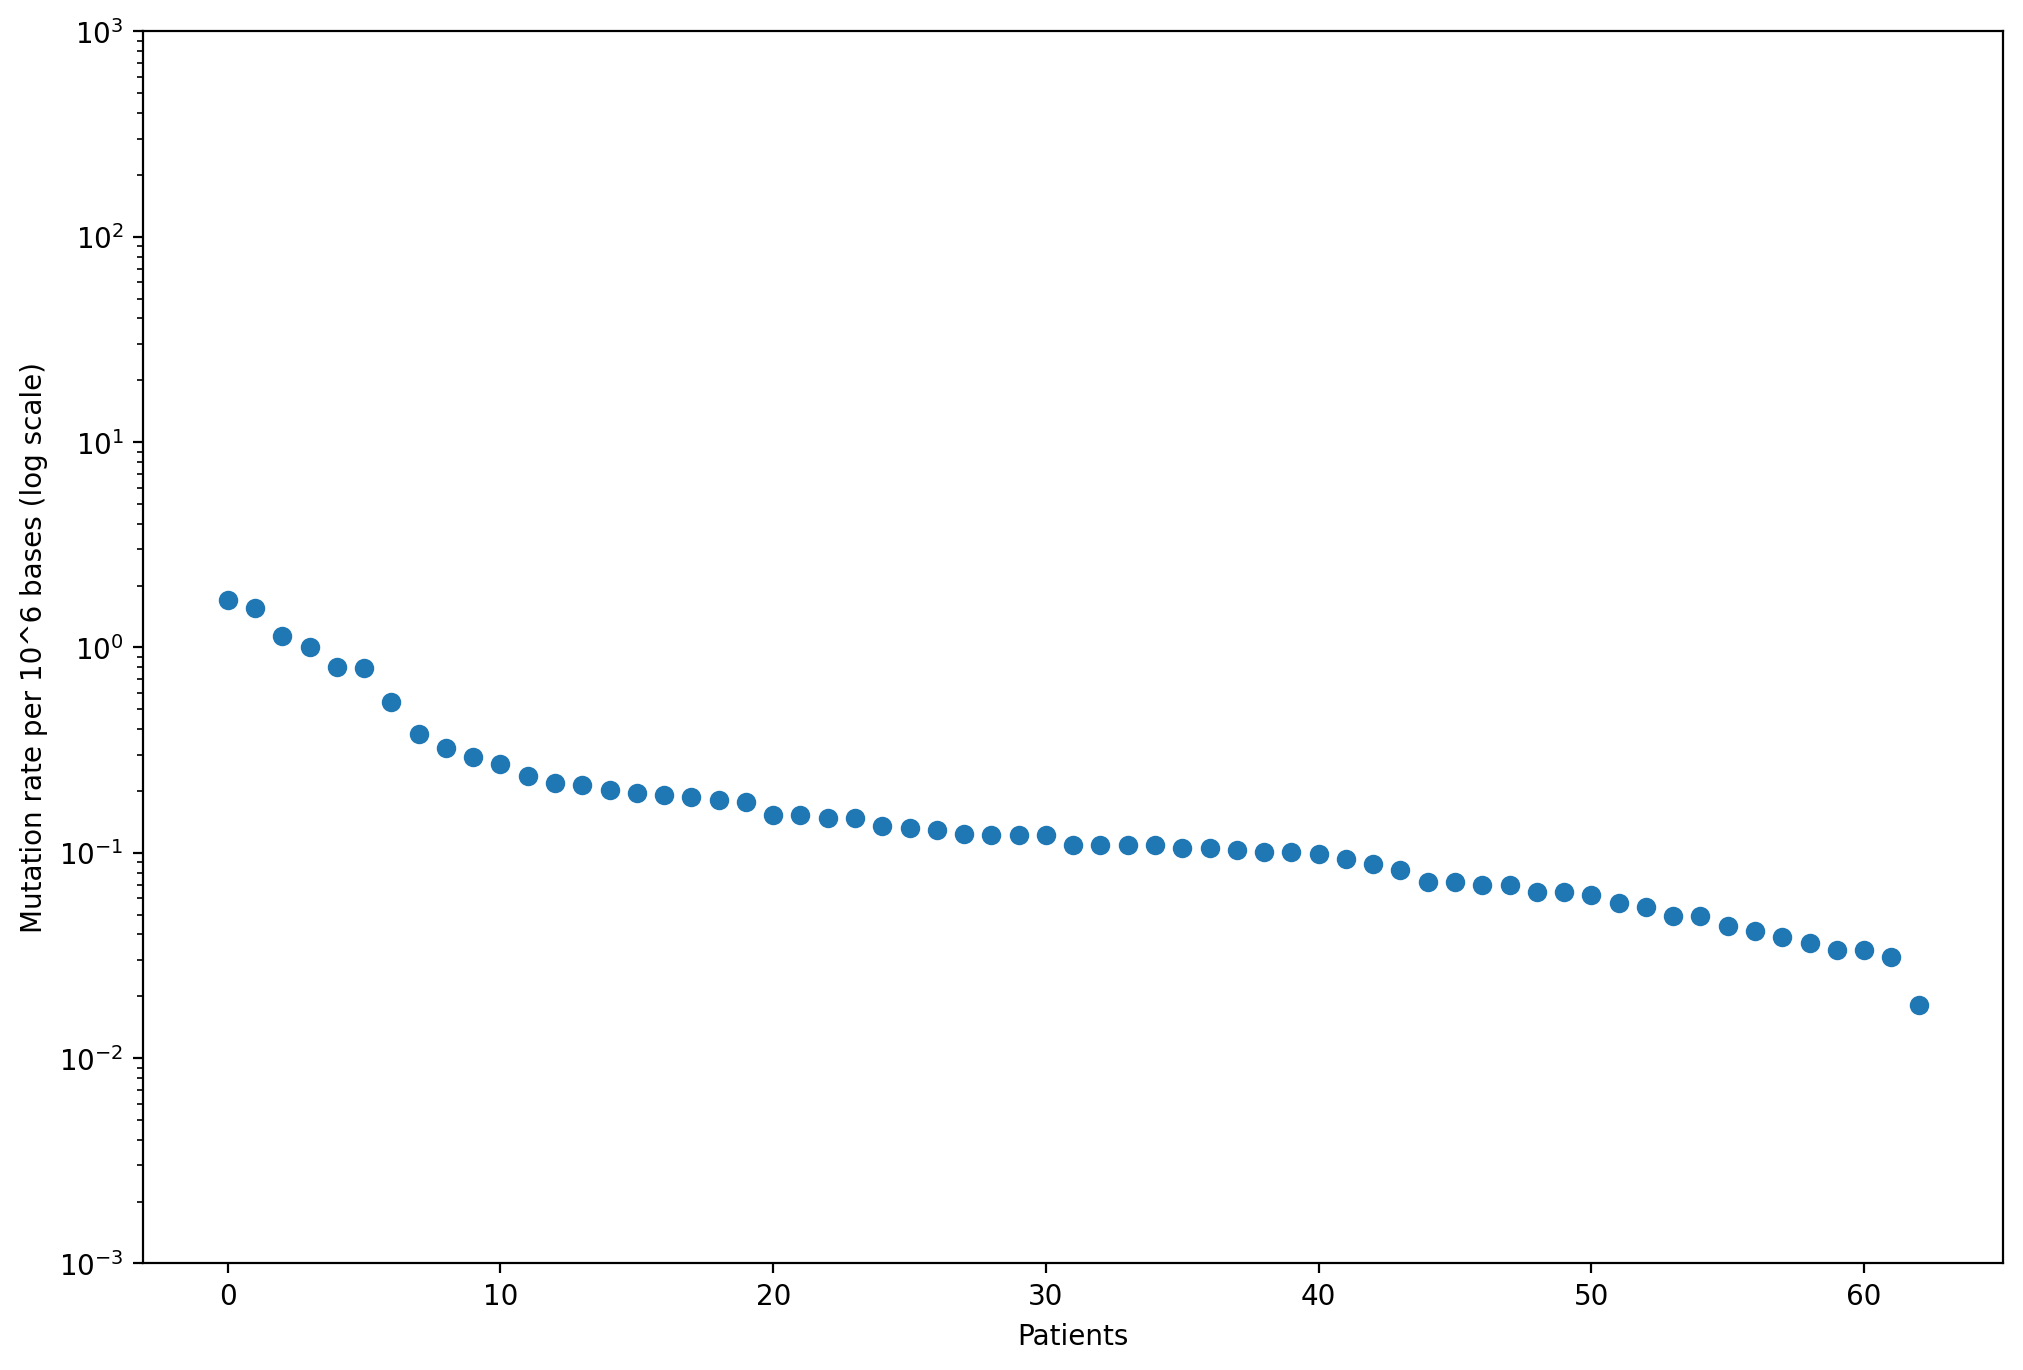

In [81]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [82]:
genes_patients_ductal_NON_TN=data_mutation_ductal_NON_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [83]:
genes_patients_ductal_NON_TN=genes_patients_ductal_NON_TN.drop_duplicates()

In [84]:
n_of_pts_per_gene_ductal_NON_TN= genes_patients_ductal_NON_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_NON_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [85]:
tot_pts_ductal_NON_TN = 63

In [86]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_NON_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_NON_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_NON_TN

In [87]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_NON_TN= n_of_pts_per_gene_ductal_NON_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [88]:
gene_mutation_frequency_ductal_NON_TN = n_of_pts_per_gene_ductal_NON_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [89]:
# select the first 50 genes
highest_mutated_genes_ductal_NON_TN=gene_mutation_frequency_ductal_NON_TN.head(50)

In [90]:
mutated_gene_names=highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'].tolist()

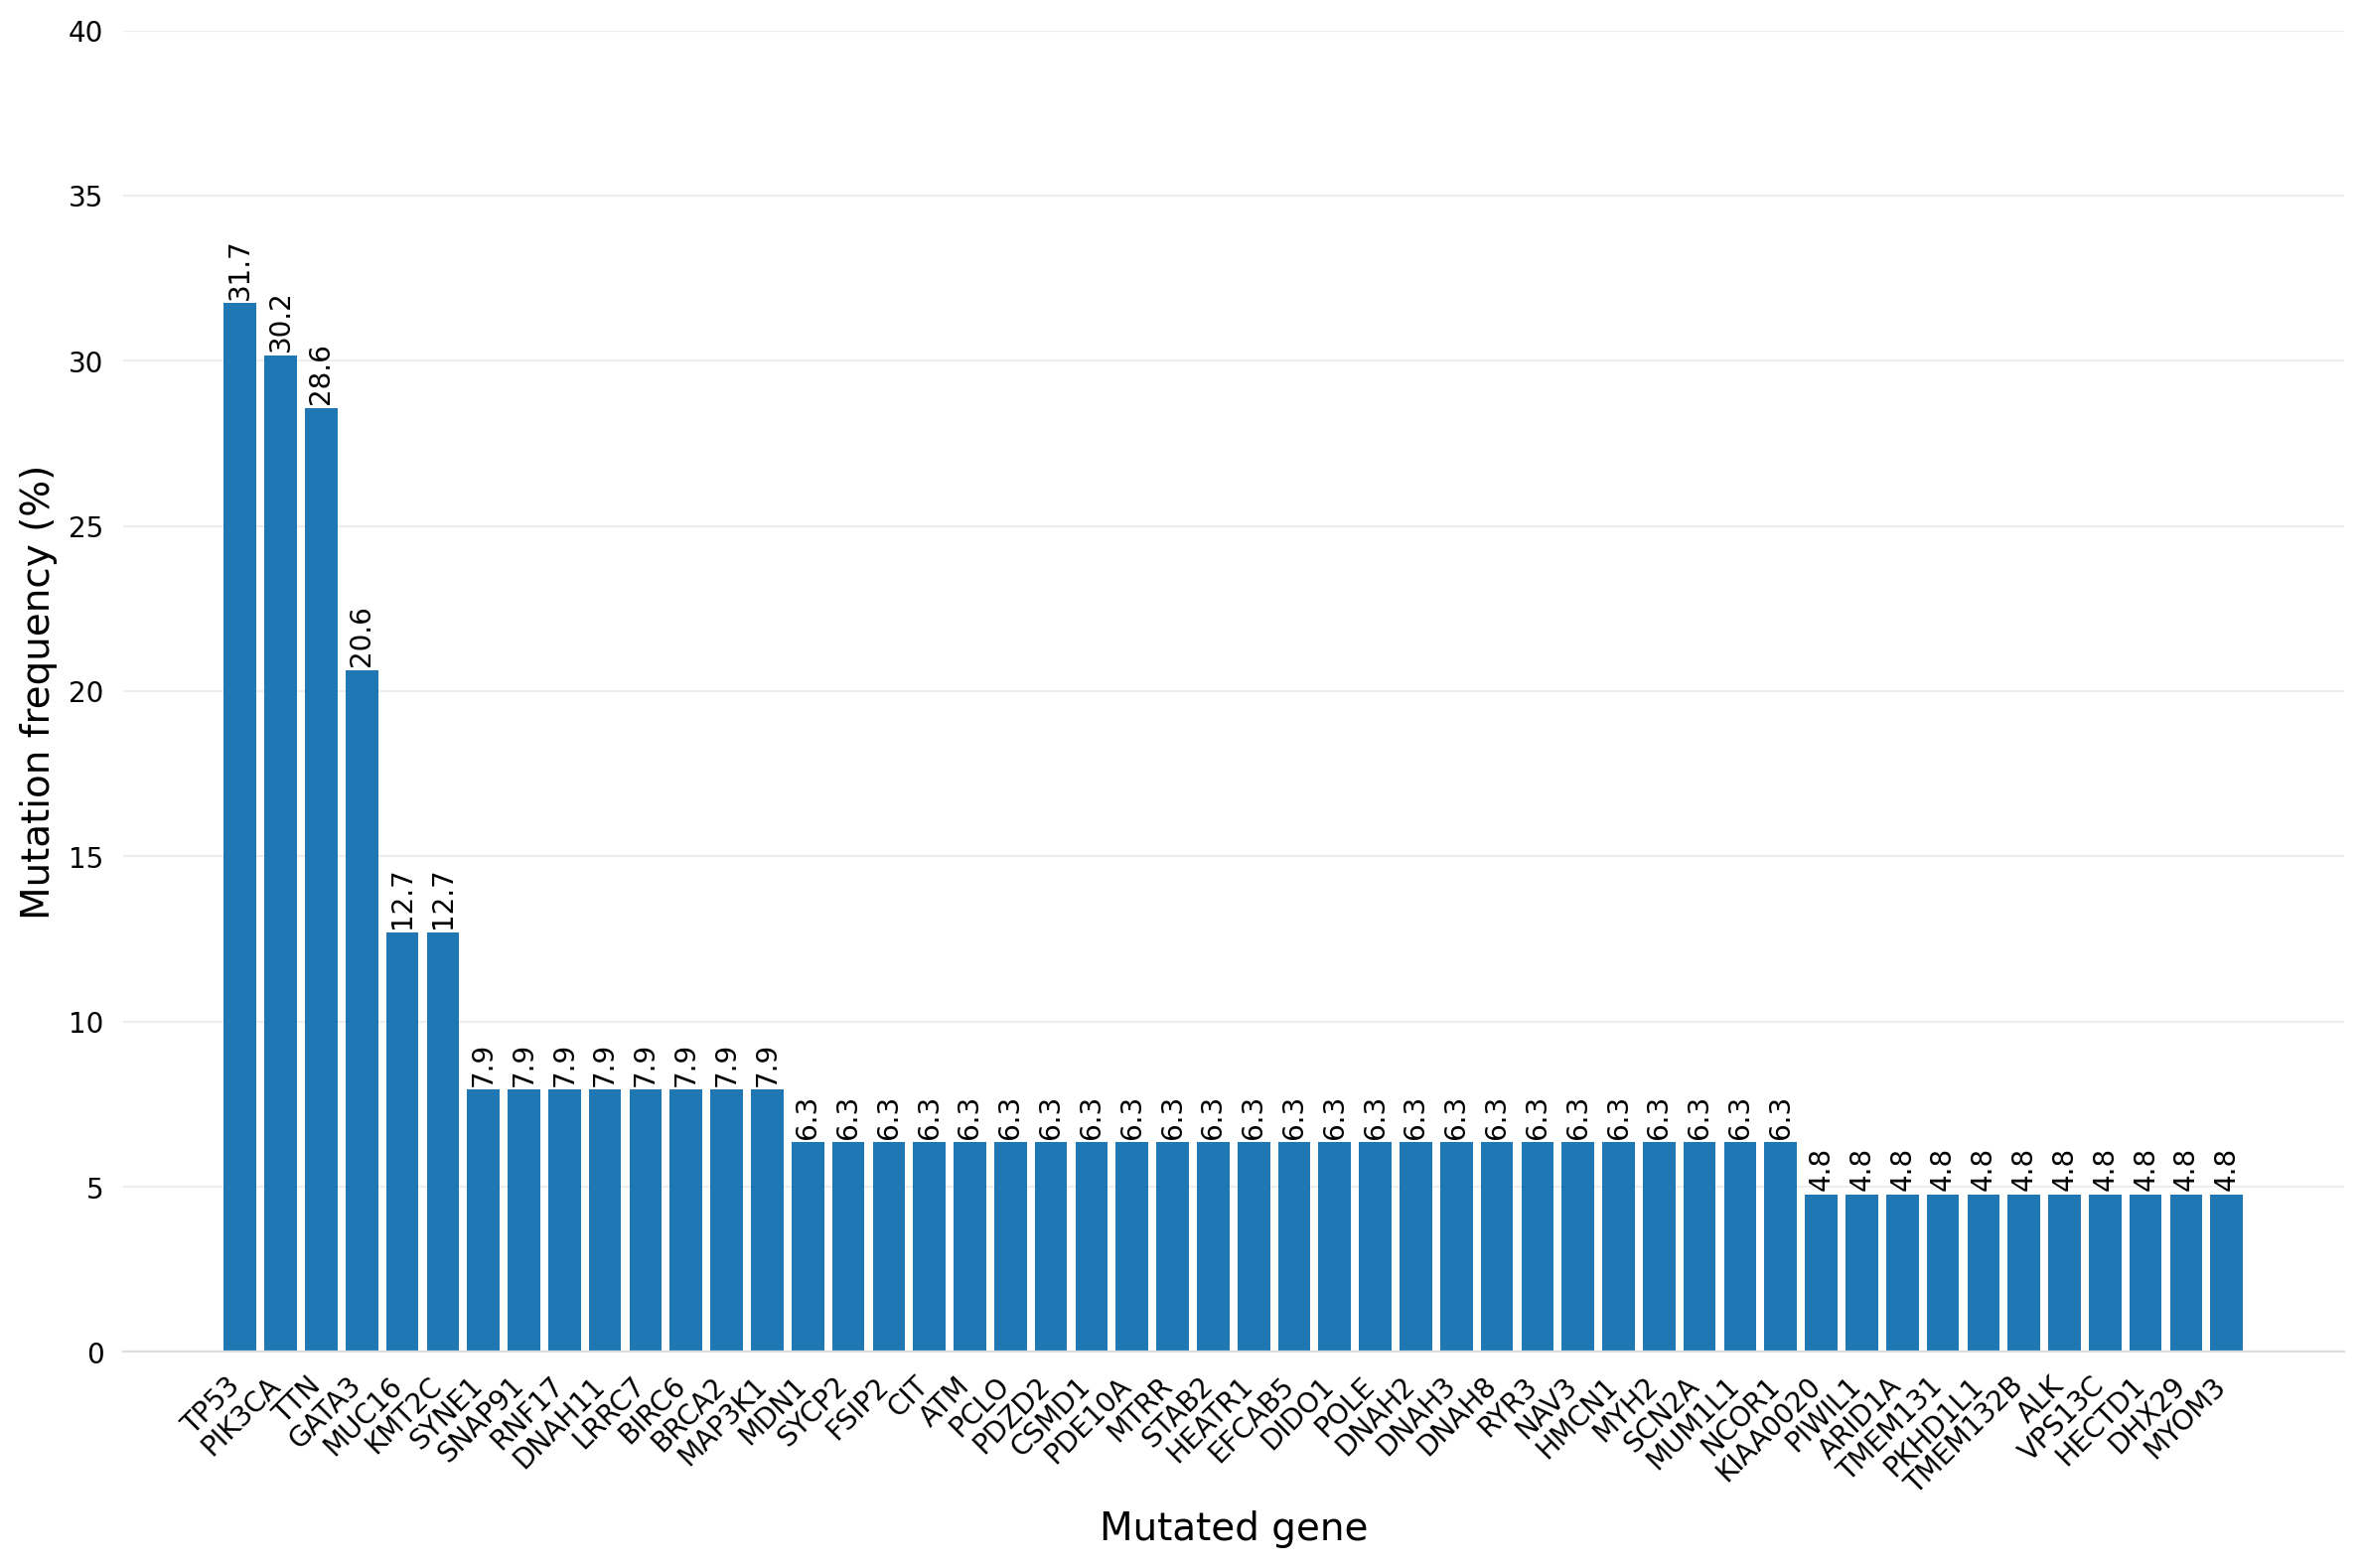

In [91]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'], highest_mutated_genes_ductal_NON_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 40)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()